In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras

### Predict 10 steps ahead
### Data (Sequence-Vector)

In [3]:
def generate_time_series (m, n_seq):#m個樣本,n_seq長度的時間序列
    freq1, freq2, offsets1, offsets2 = np. random. rand (4, m, 1)
    time = np. linspace(0, 1, n_seq)
    series = 0.5 * np.cos((time - offsets1) * (freq1 * 10 + 10))
    series += 0.3* np.sin((time - offsets2) * (freq2 * 20+20))
    series += 0.1 * (np. random. rand(m, n_seq) - 0.5) 
    return series [..., np.newaxis].astype(np.float32)

In [4]:
np. random. seed (1)
n_seq = 30
n_pred = 10# 往前預測10個樣本
series = generate_time_series (5000, n_seq + n_pred)
series. shape

(5000, 40, 1)

In [5]:
x_train, y_train = series [:3000, :n_seq], series [:3000, -n_pred:, 0]
x_valid, y_valid = series [3000:4000, :n_seq], series [3000:4000, -n_pred:, 0]
x_test, y_test =series [4000:, :n_seq], series [4000:, -n_pred:, 0]


In [6]:
x_train.shape, y_train. shape

((3000, 30, 1), (3000, 10))

In [21]:
def plot_seq(x, y, y_pred=None):
    plt.plot(x,'.-')
    n_seq = x. shape [0]
    ahead = y. shape [0]
    plt.plot(np.arange (n_seq, n_seq + ahead), y, 'go-', label='$y$') 
    if y_pred is not None:
        plt.plot (np.arange (n_seq, n_seq + ahead), y_pred, 'rx-',
                  label='$\hat y$', markersize=10)
    plt.hlines (0, 0, n_seq + ahead, linewidth=1) 
    plt.axis([0, n_seq + ahead, -1, 1]) 
    plt.grid(True) 
    plt.legend(fontsize=14)

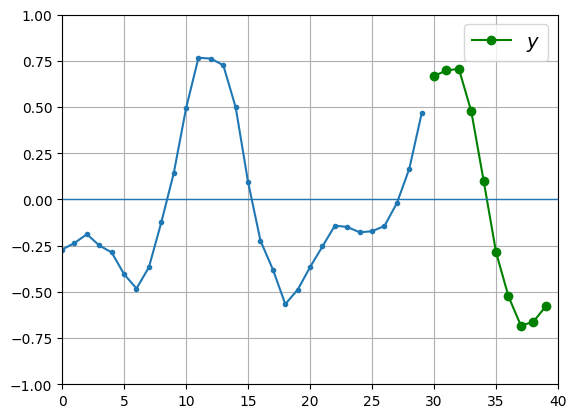

In [22]:
plot_seq(x_test [0, :, 0], y_test [0])

In [23]:
# 1. Build model
np. random. seed (1)
tf. random. set_seed (1)

In [24]:
model = keras.models.Sequential([
    keras. layers. SimpleRNN(20, return_sequences=True, input_shape= [None, 1]), 
    keras. layers. SimpleRNN (20), 
    keras.layers. Dense (10)
])

In [25]:
model.summary()
'''
 simple_rnn (SimpleRNN)  440 = (1+1+20)*20神經元
 simple_rnn_1 (SimpleRNN) 820=(1+20+20)*20 
 dense (Dense)  210=(1+20)*10   
'''

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


'\n simple_rnn (SimpleRNN)  440 = (1+1+20)*20神經元\n                                                                 \n simple_rnn_1 (SimpleRNN) 820=(1+20+20)*20       \n                                                                 \n dense (Dense)  210=(1+20)*10   \n'

In [26]:
# 2. Compile 
model.compile(loss='mse', optimizer='adam')#連續型資料

In [27]:
# 3. Train
train = model. fit (x_train, y_train, epochs=20, 
                    validation_data=(x_valid, y_valid))


Epoch 1/20
94/94 [==============================] - 5s 19ms/step - loss: 0.1467 - val_loss: 0.0984
Epoch 2/20
94/94 [==============================] - 1s 15ms/step - loss: 0.0826 - val_loss: 0.0781
Epoch 3/20
94/94 [==============================] - 1s 16ms/step - loss: 0.0705 - val_loss: 0.0707
Epoch 4/20
94/94 [==============================] - 2s 16ms/step - loss: 0.0627 - val_loss: 0.0609
Epoch 5/20
94/94 [==============================] - 1s 15ms/step - loss: 0.0560 - val_loss: 0.0533
Epoch 6/20
94/94 [==============================] - 1s 16ms/step - loss: 0.0502 - val_loss: 0.0497
Epoch 7/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0449 - val_loss: 0.0424
Epoch 8/20
94/94 [==============================] - 2s 26ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 9/20
94/94 [==============================] - 2s 18ms/step - loss: 0.0378 - val_loss: 0.0420
Epoch 10/20
94/94 [==============================] - 1s 15ms/step - loss: 0.0372 - val_loss: 0.0362
Epoch 11/

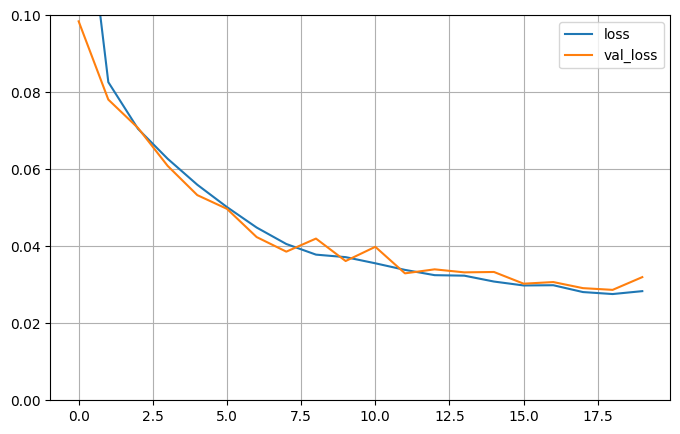

In [28]:
pd.DataFrame(train.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.ylim(0, 0.1) 
plt. show()

In [29]:
# 4. Evaluate
model. evaluate(x_test, y_test)

32/32 [==============================] - 0s 5ms/step - loss: 0.0314


0.031410153955221176

In [30]:
# 5. Predict
y_pred = model.predict(x_test)

32/32 [==============================] - 1s 7ms/step


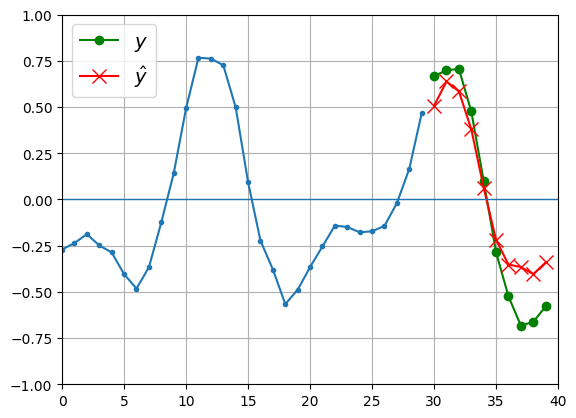

In [31]:
i = 0
plot_seq(x_test[i, :, 0], y_test[i], y_pred [i])

### Sequence-Sequence

In [32]:
# Data (Sequence-Sequence)
np. random. seed (1)
n_seq = 30
n_pred = 10
series = generate_time_series (5000, n_seq + n_pred)
series. shape

(5000, 40, 1)

In [33]:
x_train = series [:3000, :n_seq]
x_valid = series [3000:4000, :n_seq]
x_test =series [4000:, :n_seq]

In [34]:
y = np. empty((5000, n_seq, n_pred))
for step_ahead in range(1, n_pred + 1):
    y[..., step_ahead - 1] = series [..., step_ahead: step_ahead + n_seq, 0]

y_train = y[:3000]
y_valid = y[3000:4000]
y_test = y [4000:]

In [35]:
x_train.shape, y_train. shape

((3000, 30, 1), (3000, 30, 10))

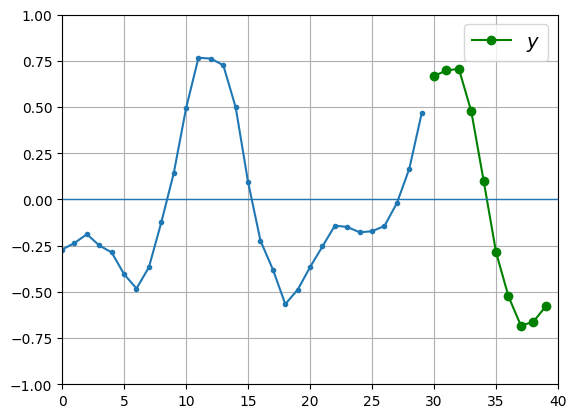

In [39]:
plot_seq(x_test[0, :, 0], y_test[0, -1])

In [40]:
# 1. Build Model
np. random. seed (1)
tf. random. set_seed (1)

In [41]:
model = keras.models.Sequential([
    keras. layers. SimpleRNN(20, return_sequences=True, input_shape= [None, 1]), 
    keras. layers. SimpleRNN(20, return_sequences=True), 
    keras. layers.TimeDistributed(keras. layers. Dense (10)) #----->TimeDistributed 用在多點預測效果佳
])

In [45]:
model.summary()
'''
 simple_rnn_4 (SimpleRNN)  440 = (1+1+20)*20
 simple_rnn_5 (SimpleRNN)  820  =  (1+20+20)*20
 time_distributed (TimeDistr   210 =  (1+20)*10
'''

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 time_distributed (TimeDistr  (None, None, 10)         210       
 ibuted)                                                         
                                                                 
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


'\n\n'

In [47]:
# 2. Compile
def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:,-1], y_pred[:,-1])
    # 只需注意最后 10 個值(S30~, y30~)：真實y 與預測y的loss比對

model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate =0.01),
              metrics= [last_time_step_mse])


In [48]:
# 3. Train
train = model.fit (x_train, y_train, epochs=20, 
                   validation_data=(x_valid, y_valid))

Epoch 1/20
94/94 [==============================] - 6s 33ms/step - loss: 0.0941 - last_time_step_mse: 0.0838 - val_loss: 0.0854 - val_last_time_step_mse: 0.0717
Epoch 2/20
94/94 [==============================] - 1s 16ms/step - loss: 0.0788 - last_time_step_mse: 0.0611 - val_loss: 0.0783 - val_last_time_step_mse: 0.0586
Epoch 3/20
94/94 [==============================] - 2s 16ms/step - loss: 0.0715 - last_time_step_mse: 0.0517 - val_loss: 0.0704 - val_last_time_step_mse: 0.0544
Epoch 4/20
94/94 [==============================] - 1s 15ms/step - loss: 0.0651 - last_time_step_mse: 0.0422 - val_loss: 0.0688 - val_last_time_step_mse: 0.0502
Epoch 5/20
94/94 [==============================] - 1s 15ms/step - loss: 0.0568 - last_time_step_mse: 0.0308 - val_loss: 0.0523 - val_last_time_step_mse: 0.0277
Epoch 6/20
94/94 [==============================] - 2s 16ms/step - loss: 0.0500 - last_time_step_mse: 0.0239 - val_loss: 0.0562 - val_last_time_step_mse: 0.0307
Epoch 7/20
94/94 [================

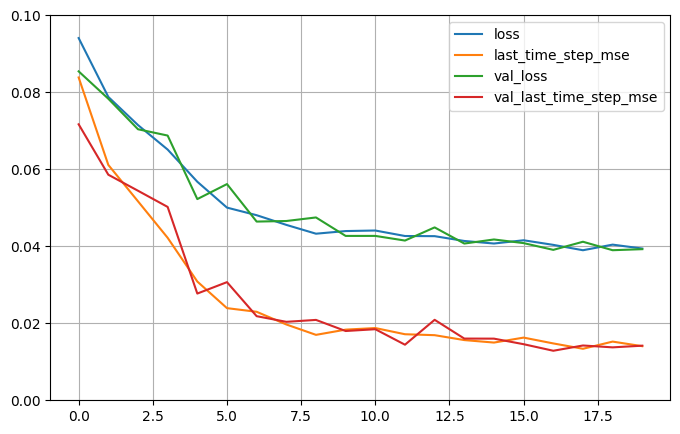

In [50]:
pd. DataFrame(train.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.ylim(0, 0.1) 
plt. show()

In [51]:
# 4. Evaluate
model. evaluate(x_test, y_test)

32/32 [==============================] - 0s 5ms/step - loss: 0.0389 - last_time_step_mse: 0.0141


[0.03892975300550461, 0.014111597090959549]

In [52]:
# 5. Predict
y_pred = model.predict (x_test)
y_test. shape, y_pred. shape


32/32 [==============================] - 0s 5ms/step


((1000, 30, 10), (1000, 30, 10))

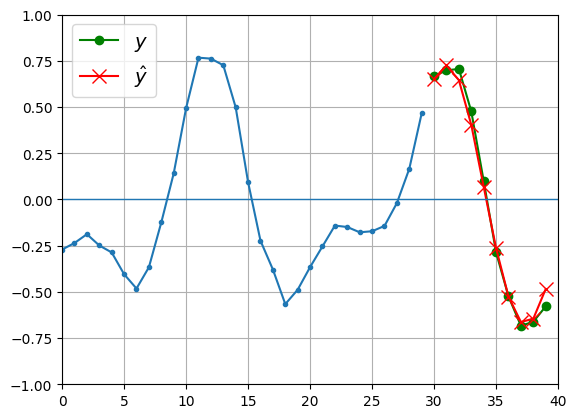

In [53]:
i = 0
plot_seq(x_test[i, :, 0], y_test[i, -1], y_pred[i, -1])